Estimado candidato,

Estamos encantados de que estés considerando unirte a nuestro equipo de ciencia de datos. Como parte de nuestro proceso de evaluación, te pedimos que completes la siguiente prueba técnica.

**Descripción de la tarea:**

Se te proporciona un conjunto de datos anónimos que consta de varias columnas nombradas como 'col1', 'col2', 'col3', etc., hasta 'col20', y una columna 'target' que representa la variable objetivo. Tu tarea es realizar un análisis exploratorio de datos (EDA) y construir un modelo de aprendizaje automático para predecir la variable 'target'.

**Detalles de la tarea:**

1. **Análisis exploratorio de datos (EDA):** Realiza un análisis exploratorio detallado de los datos. Esto debe incluir, pero no está limitado a:
   - Estadísticas descriptivas de las variables (mínimo, máximo, media, mediana, desviación estándar, etc.).
   - Verificación de valores perdidos o anómalos.
   - Análisis de correlación entre las variables.
   - Visualizaciones para entender mejor las distribuciones y relaciones de los datos.

2. **Preprocesamiento de datos:** Prepárate para realizar cualquier limpieza o transformación necesaria de los datos basándote en tu EDA.

3. **Creación de un modelo de línea base (Baseline):** Entrena varios modelos de aprendizaje automático para predecir la variable 'target'. Comienza con modelos sencillos como la regresión logística y avanza hacia modelos más complejos como los árboles de decisión, random forest, SVM, XGBoost, etc.

4. **Evaluación del modelo:** Evalúa el rendimiento de cada modelo utilizando métricas apropiadas. Por ejemplo, si 'target' es una variable binaria, podrías considerar la precisión, la sensibilidad, la especificidad, el AUC-ROC, etc.

5. **Selección del modelo:** Selecciona el modelo que creas que funciona mejor. Justifica tu elección basándote en las métricas de evaluación y cualquier otra consideración pertinente.

6. **Predicción:** Usa tu modelo seleccionado para hacer predicciones en el conjunto de datos.

**Entregables:**

Por favor, proporciona el código que hayas utilizado para completar esta tarea, junto con un informe detallado que explique tu enfoque y los resultados. El informe debe estar bien estructurado y ser fácil de seguir, permitiendo a los evaluadores entender tu proceso de pensamiento y las decisiones que hayas tomado.

¡Buena suerte y esperamos ver tu solución!

# Importación de librerías

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
pd.options.display.max_columns = 0

# Modelos
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, \
roc_curve, roc_auc_score, ConfusionMatrixDisplay, multilabel_confusion_matrix

# Carga de datos

In [3]:
data = pd.read_csv("data/train.csv")

data.head()

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
0,4995,0.02,26.80,0.09,1.35,0.060,0.09,0.09,1.97,1.48,0.00,0.009,0.031,9.52,0.84,0.001,1.24,0.96,0.09,0.08,0.08,0
1,1709,1.13,3.95,0.32,3.95,0.030,4.66,0.56,1.89,1.36,0.82,0.820,0.170,13.83,1.15,0.006,10.55,3.76,0.02,0.45,0.06,0
2,7825,0.07,8.05,0.04,0.14,0.040,0.06,0.06,0.05,0.00,0.00,0.000,0.120,2.61,1.52,0.008,4.13,0.27,0.03,0.03,0.01,0
3,6918,0.09,26.40,0.03,0.92,0.090,0.57,0.00,0.36,0.03,0.23,0.004,0.055,5.22,1.96,0.000,11.32,0.25,0.09,0.01,0.05,0
4,5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,0.67,0.670,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1


# Primer análisis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5597 entries, 0 to 5596
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      5597 non-null   int64  
 1   col1    5597 non-null   float64
 2   col2    5597 non-null   float64
 3   col3    5597 non-null   float64
 4   col4    5597 non-null   float64
 5   col5    5597 non-null   float64
 6   col6    5597 non-null   float64
 7   col7    5597 non-null   float64
 8   col8    5597 non-null   float64
 9   col9    5597 non-null   float64
 10  col10   5597 non-null   float64
 11  col11   5597 non-null   float64
 12  col12   5597 non-null   float64
 13  col13   5597 non-null   float64
 14  col14   5597 non-null   float64
 15  col15   5597 non-null   float64
 16  col16   5597 non-null   float64
 17  col17   5597 non-null   float64
 18  col18   5597 non-null   float64
 19  col19   5597 non-null   float64
 20  col20   5597 non-null   float64
 21  target  5597 non-null   int64  
dtype

In [5]:
data.describe()

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
count,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000
mean,3962.909952,0.674797,14.438840,0.163603,1.579702,0.042747,2.213093,0.250890,0.807654,0.766057,0.324309,0.329693,0.100050,9.819267,1.331880,0.005194,16.621249,2.931896,0.049602,0.149855,0.044999,0.114347
std,2311.129964,1.273677,8.851097,0.254659,1.221220,0.036072,2.581244,0.272472,0.652471,0.436435,0.328954,0.377353,0.057997,5.581795,0.568734,0.002960,17.729833,2.327347,0.028827,0.144170,0.026929,0.318261
min,0.000000,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1963.000000,0.040000,6.850000,0.030000,0.550000,0.008000,0.100000,0.050000,0.090000,0.400000,0.000000,0.002000,0.049000,4.940000,1.010000,0.003000,2.220000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,3922.000000,0.070000,14.390000,0.050000,1.210000,0.040000,0.550000,0.090000,0.750000,0.760000,0.230000,0.008000,0.103000,9.860000,1.420000,0.005000,7.840000,2.430000,0.050000,0.080000,0.050000,0.000000
75%,5960.000000,0.290000,22.260000,0.100000,2.510000,0.070000,4.330000,0.450000,1.390000,1.160000,0.610000,0.700000,0.151000,14.690000,1.760000,0.008000,29.980000,4.670000,0.070000,0.250000,0.070000,0.000000
max,7993.000000,5.050000,29.840000,1.050000,4.940000,0.130000,8.660000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.820000,2.890000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


A primera vista, es un dataset con 5597 filas y 22 columnas, con los datos muy limpios (no hay valores nulos o raros)

# EDA

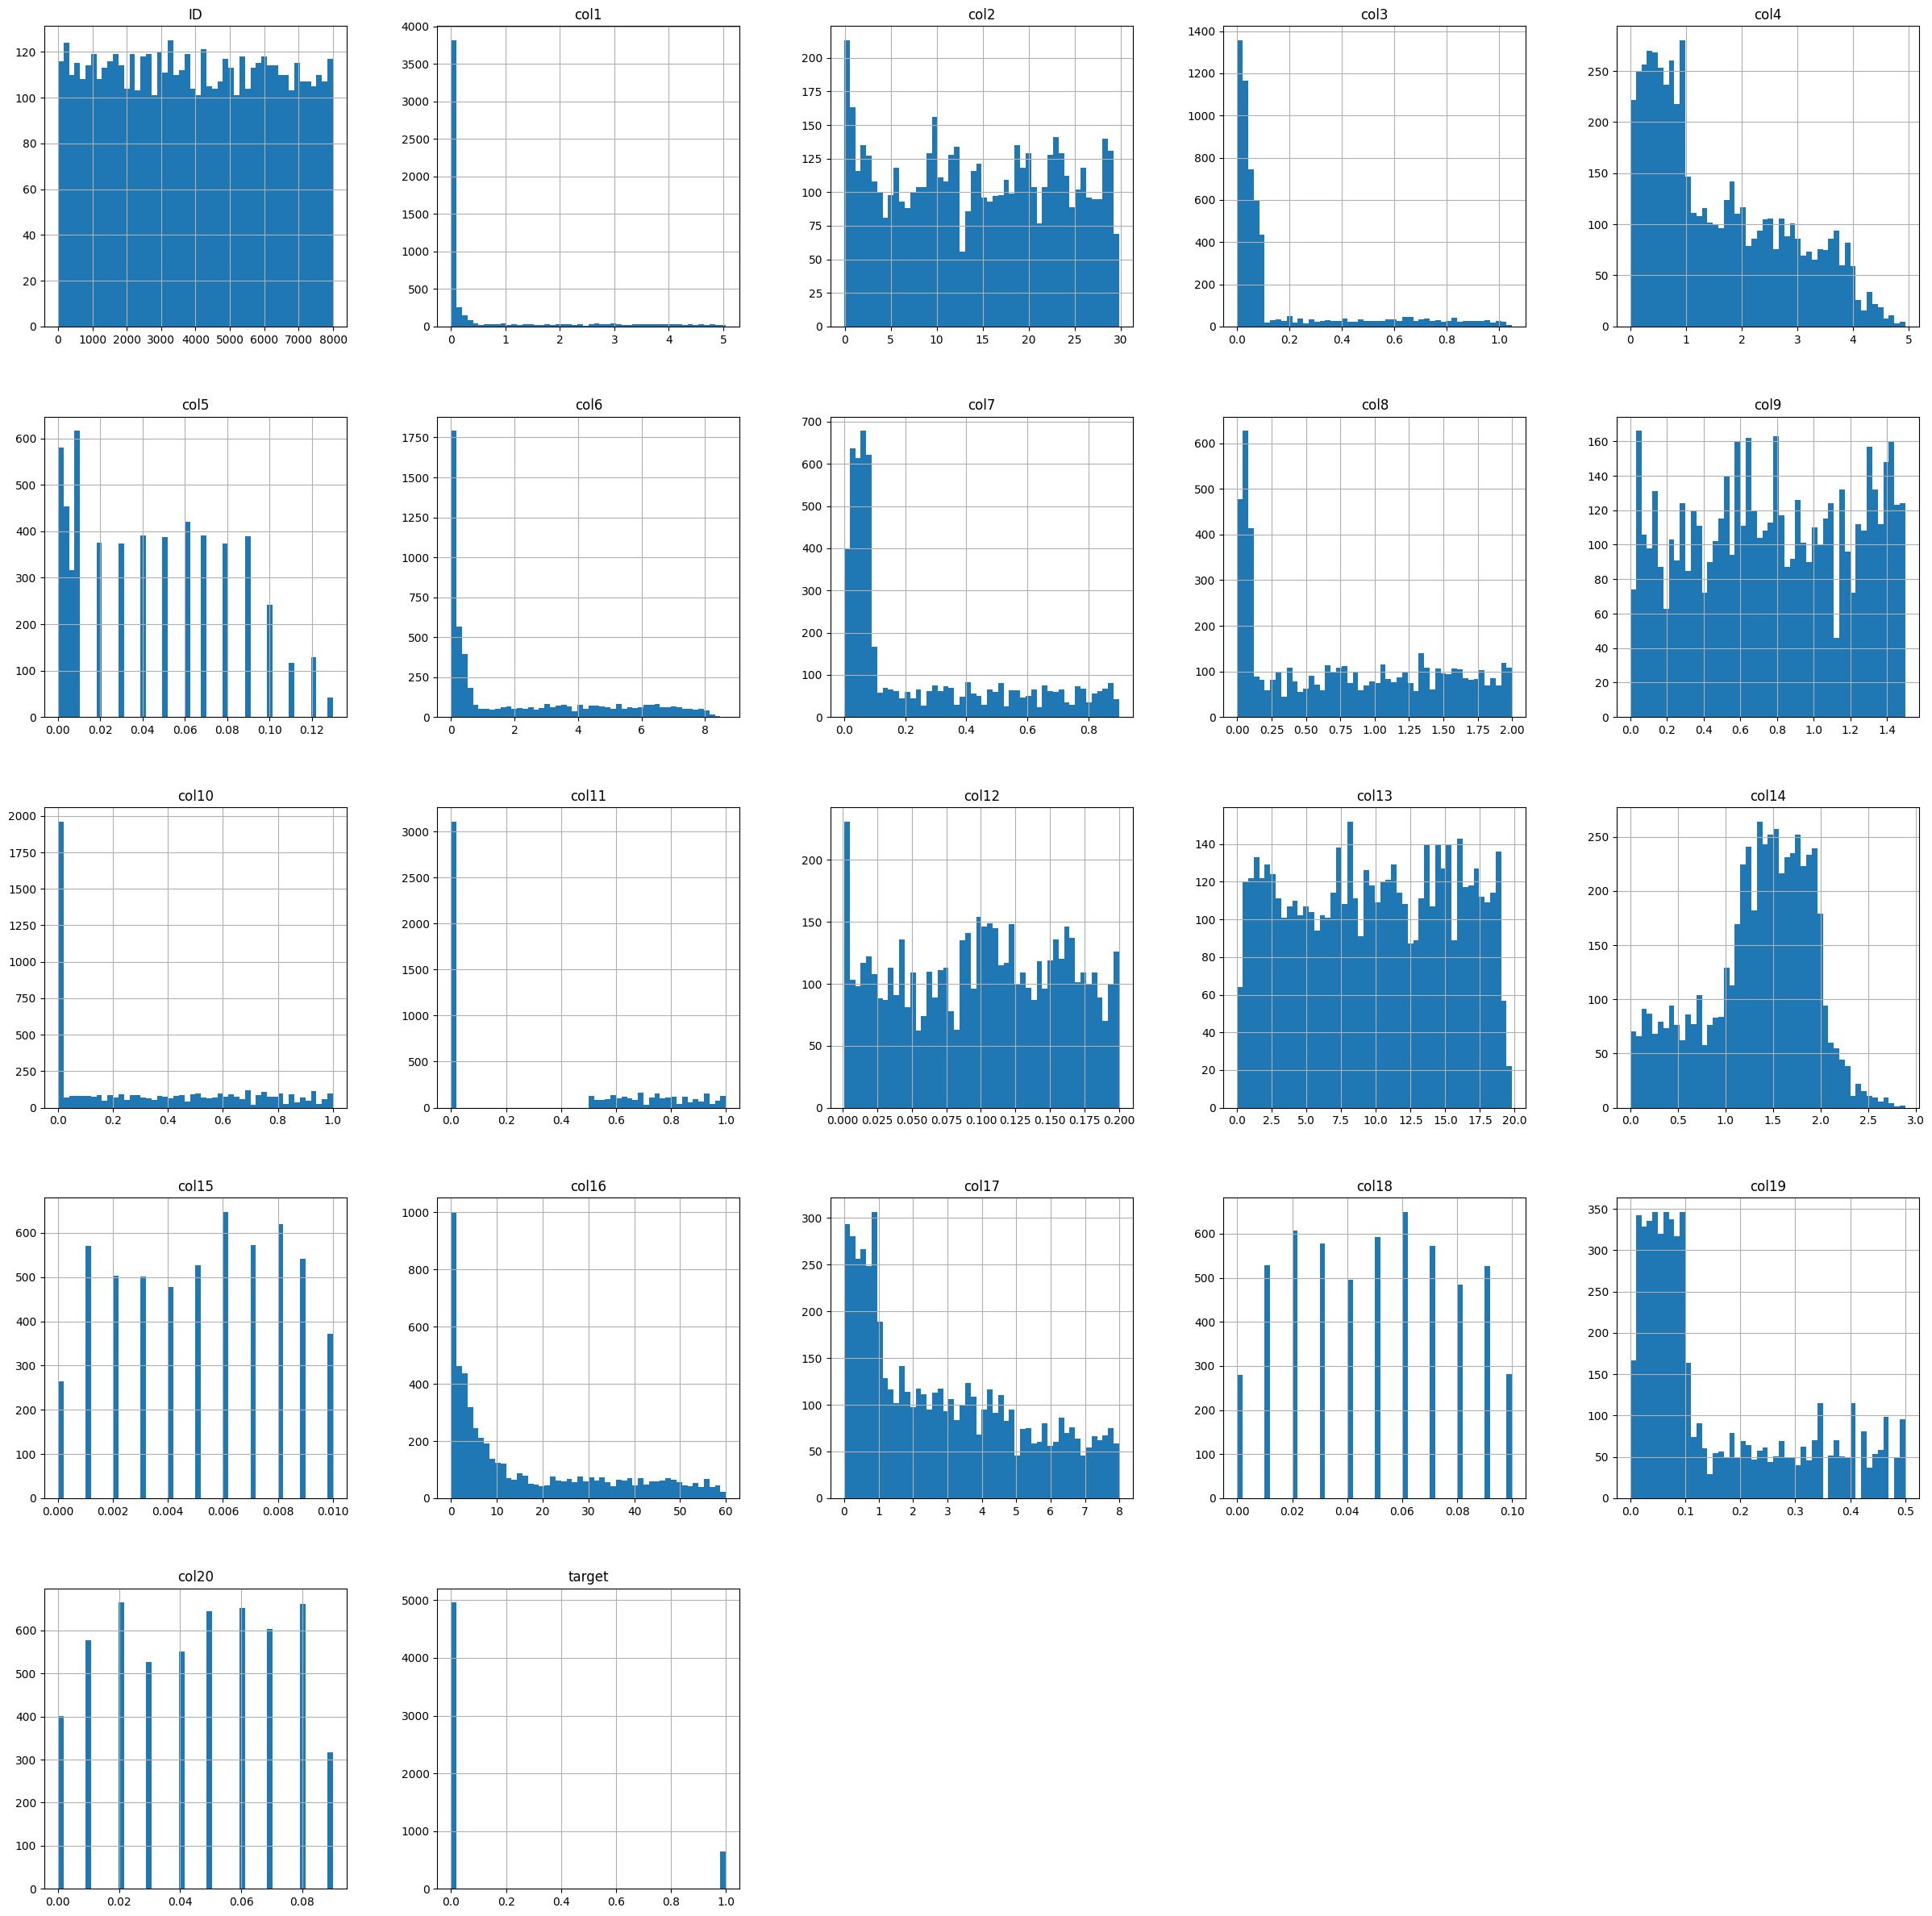

In [6]:
data.hist(figsize=(30,30), bins=50);

In [16]:
data["col16"].value_counts()

col16
0.18     21
0.05     20
0.10     18
0.35     17
0.34     17
         ..
3.41      1
6.32      1
54.24     1
31.16     1
17.18     1
Name: count, Length: 2562, dtype: int64

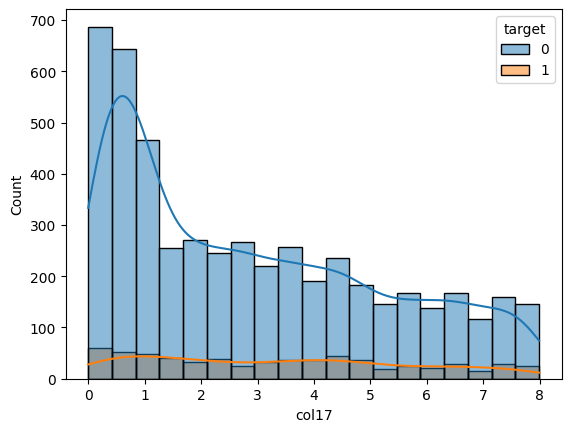

In [13]:
sns.histplot(x='col17',data=data, hue='target', kde=True);

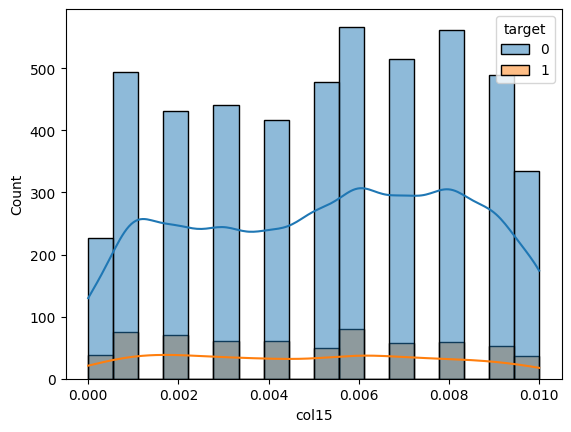

In [15]:
sns.histplot(x='col15',data=data, hue='target', kde=True);

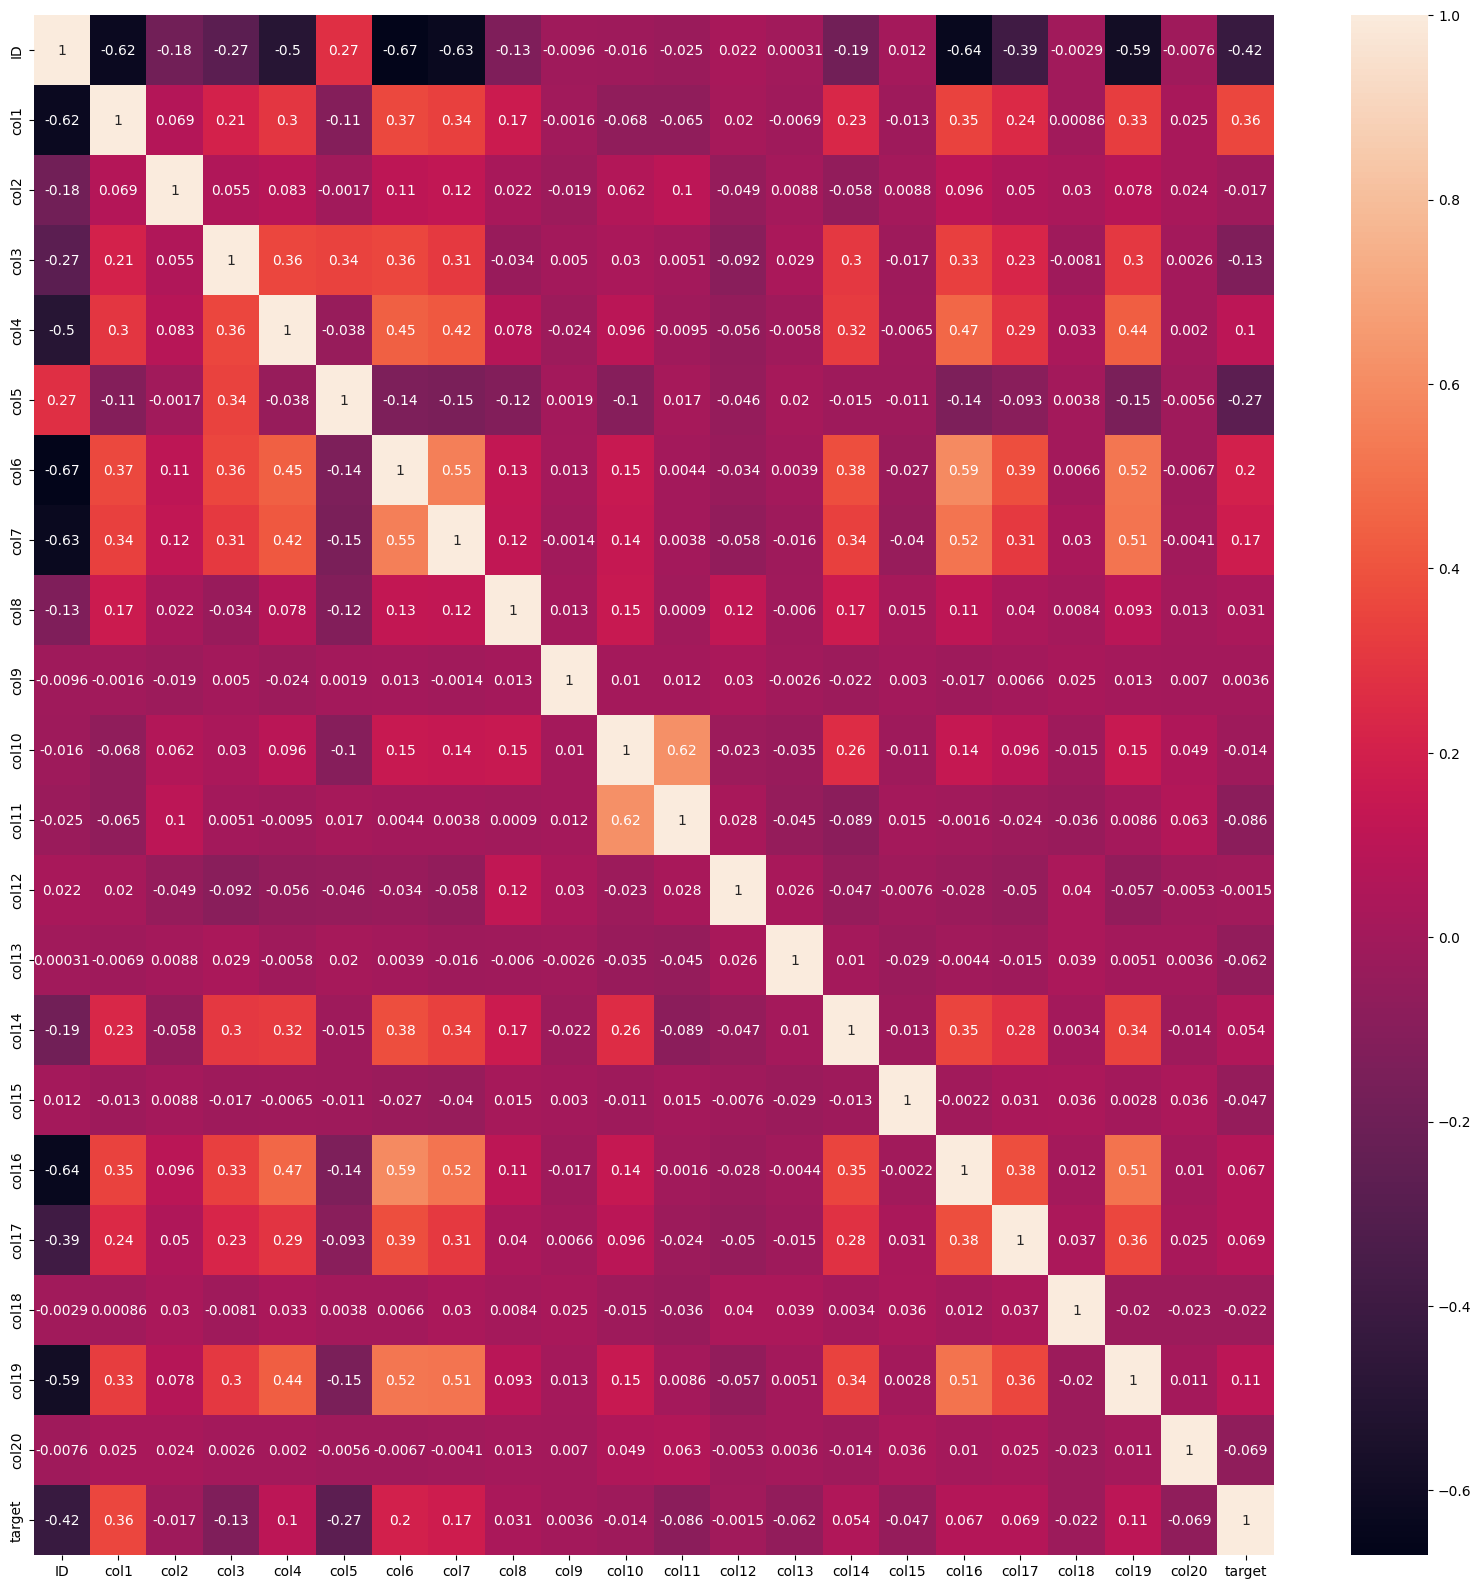

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(numeric_only=True), annot=True);

# Division de datos y train-test

In [40]:
X = data.drop(columns=["target", "ID"], axis=1)
y = data["target"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# BaseLines y CV

In [42]:
modelos = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(verbose=False)
}

# Define las métricas a usar
metricas = ["accuracy", "f1_macro", "recall_macro", "precision_macro", "roc_auc_ovr"]

resultados_dict = {}

for nombre_modelo, modelo in modelos.items():
    cv_resultados = cross_validate(modelo, X_train, y_train, cv=3, scoring=metricas)
    
    for metrica in metricas:
        clave = f"{nombre_modelo}_{metrica}"
        resultados_dict[clave] = cv_resultados[f"test_{metrica}"].mean()

# Convertir el diccionario de resultados en DataFrame
resultados_df = pd.DataFrame([resultados_dict])


In [43]:
resultados_df.T.head().sort_values(by=0)

,0
Logistic Regression_recall_macro,0.643301
Logistic Regression_f1_macro,0.682828
Logistic Regression_precision_macro,0.791437
Logistic Regression_roc_auc_ovr,0.862870
Logistic Regression_accuracy,0.903061


El modelo que mejor resultado da es **Logistic Regression**, con la metrica de **recall**

In [44]:
lg = LogisticRegression(max_iter=10000)

lg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [46]:
pred = lg.predict(X_test)
pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [47]:
lg.score(X_test, y_test)

0.9035714285714286

La precisión es de 0.9, con lo que es un buen valor

In [48]:
recall_score(y_test, pred, average="macro")

0.6529737903225806

# Optimización por GridSearch

In [57]:
param_grid = {
    "solver" : ['newton-cg'],
    "penalty" : ['l2'],
    "C" : [100, 10, 1.0, 0.1, 0.01]
}

lReg = LogisticRegression(max_iter=10000)

grid_search = GridSearchCV(lReg,
                           param_grid,
                           cv=5,
                           scoring='recall_macro',
                           n_jobs=-1
                          )
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg']},
             scoring='recall_macro')

In [58]:
grid_search.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [59]:
grid_search.best_score_

0.6793369380710572

In [62]:
lReg = LogisticRegression(max_iter=10000, C= 100, penalty= 'l2', solver = 'newton-cg')
lReg.fit(X_train, y_train)

pred = lReg.predict(X_test)
pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [63]:
recall_score(y_test, pred, average="macro")

0.6769153225806452

Tras reentrenar el modelo con los valores óptimos de los hiperparámetros, vemos que el valor de la métrica se mejora (0.67 actual vs 0.64 previo)

In [71]:
test = pd.read_csv("data/test.csv")
test.head()

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20
0,2816,0.06,25.18,0.04,0.04,0.001,5.10,0.86,1.23,0.52,0.62,0.620,0.022,12.63,1.93,0.003,1.19,7.79,0.04,0.43,0.01
1,3641,0.09,27.51,0.63,2.05,0.110,6.81,0.83,0.09,1.21,0.73,0.730,0.001,4.49,1.95,0.009,52.30,1.00,0.10,0.12,0.01
2,7191,0.09,1.10,0.07,0.73,0.050,0.10,0.01,1.44,1.42,0.31,0.007,0.177,1.03,1.27,0.002,7.04,0.38,0.06,0.05,0.06
3,5199,0.07,11.23,0.04,1.22,0.030,0.16,0.03,1.18,0.88,0.00,0.001,0.032,4.07,0.98,0.003,1.28,0.51,0.06,0.03,0.07
4,7994,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,0.000,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00


In [74]:
testPred = test.drop("ID", axis=1)

In [76]:
predictions_submit = lReg.predict(testPred)
predictions_submit

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [77]:
pd.DataFrame({"ID" : test["ID"], "Pred":predictions_submit})

,ID,Pred
0,2816,0
1,3641,0
2,7191,0
3,5199,0
4,7994,1
...,...,...
2394,7300,0
2395,1327,0
2396,4739,0
2397,2611,0
